# Working with Sequencing

### Downloading the FASTQ file from the URL link


In [ ]:
!wget --no-check https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq

--2022-06-18 12:41:58--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.32.192.185, 13.32.192.55, 13.32.192.17, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.32.192.185|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224786 (220K) [application/octet-stream]
Saving to: ‘SRR835775_1.first1000.fastq.1’

SRR835775_1.first10 100%[===================>] 219.52K  --.-KB/s    in 0.01s   

2022-06-18 12:41:58 (21.7 MB/s) - ‘SRR835775_1.first1000.fastq.1’ saved [224786/224786]



### The format of FASTQ file for reference when writing a function to read from a FASTQ file

@SRR835775.1 1/1
TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC
+
???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################

### Create a function to read sequences from a FASTQ file
#### (Note: fh.readline reads the line but doesn't store the data)
#### (Note: len(seq) determines the end of the sequence while loop is broken)
#### (Note: once the sequence & quality has been read it is appended to the end of the list using the append() function)

In [ ]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
          fh.readline()
          seq = fh.readline().rstrip()
          fh.readline()
          qual = fh.readline().rstrip()
          if len(seq) == 0:
              break
          sequences.append(seq)
          qualities.append(qual)
    return sequences, qualities

seqs, quals = readFastq('SRR835775_1.first1000.fastq')

### Print out the first five sequences

In [ ]:
print(seqs[:5])

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGG', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAAGGGTTGGGGGTTAGGGGTAGGGGTAGGGTTA', 'CTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCTCACC']


### Print out the first five quality strings

In [ ]:
print(quals[:5])

['???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################', 'CCCFFFFFGHHGHJJJJJIJGIIJJJJJJJIJIJJJJJFJJFGIIIIH=CBFCF=CCEG)=>EHB2@@DEC>;;?=;(=?BBD?59?BA###########', '@@<DD?DDHHH<CBHII:CFGIGAGHIIG?CCGGE0BDHIIHIGICH8=FHGI=@EHGGGEEHH>);?CC@.;(=;?59,5<A599?CB>ABBCB><88A', '@CCFFDDFHHHDFHIJJCGGIJJHIIHJC?DHHIJ0?DGHI9BBFHICGGIGI=CDEGI=?AAEF7@?################################', '@<@FDFDDBBFHH@EBGGGEH@FFHE;EHIEGGBHG?)9?8BDGGBGGBCDGI=93=C6==C;CCD(?@>@#############################']


### Create a helper function to convert the ASCII scores to the Quality Scores
#### (Convert a Phred33(ASCII) Score to a Quality Score)

In [ ]:
def phred33ToQ(qual):
  return ord(qual) - 33

### What happens to the hash symbol quality score?

#### (results in a low quality score of 2, low confidence score unlikely to be correct!)

#### (Quality score = 2, corresponds to about  a 33% chance of the base being incorrect in the sequence)

In [ ]:
phred33ToQ('#')

2

### What happens to the 'J' symbol quality score?
#### (Results in high confidence that the base in the sequence is correct)
#### (<1 in 10000 chance of the base being incorrect)

In [ ]:
phred33ToQ('J')

41

### Create a Histogram of the different quality scores to determine which quality scores are most common and which are least common

#### Part 1 - Generate the frequencies of the quality scores

In [ ]:
def createHist(qualities):
  hist = [0] * 50
  for qual in qualities:    
    for phred in qual:      
      q = phred33ToQ(phred)      
      hist[q] += 1      
  return hist

h = createHist(quals)
print(h)

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


#### Part 2 - Generate the Histogram

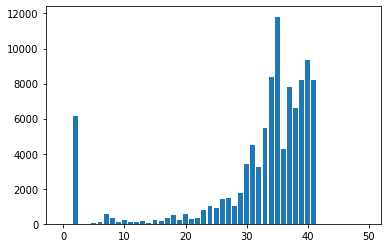

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.bar(range(len(h)), h)
plt.show()